In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import umap

pd.set_option("display.max_colwidth", 200)

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 10

#function for printing  top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
#function for ploting graph
def visualize(mat, model):
    topic = model.fit_transform(mat)
    embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(topic)

    plt.figure(figsize=(7,5))
    plt.scatter(embedding[:, 0], embedding[:, 1], c = dataset.target, s = 10, edgecolor='none')
plt.show()

In [2]:
#fetch dataset
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

#Original Topics
dataset.target_names

#creating Dataframes
doc_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
doc_df['clean_doc'] = doc_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
doc_df['clean_doc'] = doc_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
doc_df['clean_doc'] = doc_df['clean_doc'].apply(lambda x: x.lower())

stop_words = stopwords.words('english')

# tokenization
tokenized_doc = doc_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc)

# de-tokenization
detokenized_doc = []
for i in range(len(doc_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

doc_df['clean_doc'] = detokenized_doc

0        [well, sure, story, seem, biased, disagree, statement, media, ruin, israels, reputation, rediculous, media, israeli, media, world, lived, europe, realize, incidences, described, letter, occured, m...
1        [yeah, expect, people, read, actually, accept, hard, atheism, need, little, leap, faith, jimmy, logic, runs, steam, sorry, pity, sorry, feelings, denial, faith, need, well, pretend, happily, ever,...
2        [although, realize, principle, strongest, points, would, still, like, know, question, sort, arab, countries, want, continue, think, tank, charade, fixation, israel, must, stop, might, start, askin...
3        [notwithstanding, legitimate, fuss, proposal, much, change, last, product, area, priced, suspect, clipper, phones, came, customer, automatically, preregistered, government, authorities, thus, asid...
4        [well, change, scoring, playoff, pool, unfortunately, time, right, certainly, post, scoring, rules, tomorrow, matter, enter, anyway, good, keith, keller, r

In [3]:
#creating vocab and doc-word matrix for LDA using Count Vectorizer
lda_vocabulary = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
lda_doc_word_mat = lda_vocabulary.fit_transform(doc_df['clean_doc'])

#creating vocab and doc-word matrix for NMF and LSA using tf-idf vectorizer
nmf_vocabulary = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
nmf_mat = nmf_vocabulary.fit_transform(doc_df['clean_doc'])

#LDA model
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda.fit(lda_doc_word_mat)

lda_words = lda_vocabulary.get_feature_names()

#NMF model
#nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5)
nmf = NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1, l1_ratio=.5)
nmf.fit(nmf_mat)

nmf_words = nmf_vocabulary.get_feature_names()

#LSA model
lsa = TruncatedSVD(n_components=n_components)
lsa.fit(nmf_mat)

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0)

In [4]:
#print top words for LDA
print_top_words(lda, lda_words, n_top_words)

#print top words for NMF
print_top_words(nmf, nmf_words, n_top_words)

#print top words for LSA
print_top_words(lsa, lda_words, n_top_words)

Topic #0: people government right think israel make state jews fact like
Topic #1: president national public april states information american health university united
Topic #2: chip number output used line entry keys clipper data value
Topic #3: jesus believe people true bible christian think question church life
Topic #4: said armenian armenians turkish went bike came water left greek
Topic #5: space nasa research center data earth launch science satellite shuttle
Topic #6: drive game team scsi power play games hard disk season
Topic #7: know like think time work people going want really problem
Topic #8: good like price thanks best make think year know mail
Topic #9: file windows program software available files version window information using

Topic #0: think time people point read question right said things wrong
Topic #1: thanks know mail need help looking info email advance software
Topic #2: year game team think years time good games play season
Topic #3: work drive used probl

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../usr/local/lib/python3.6/dist-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/usr/local/lib/python3.6/dist-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../usr/local/lib/python3.6/dist-packages/umap/utils.py", line 409:
@numba.njit(paralle

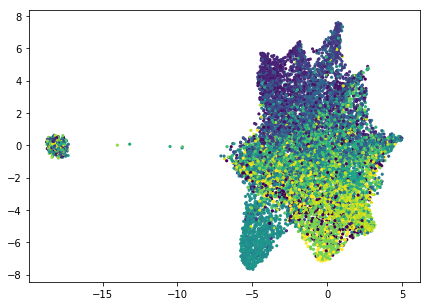

In [5]:
#Visualization for LSA
visualize(nmf_mat, lsa)

In [ ]:
#Visualization for NMF
visualize(nmf_mat, nmf)

In [ ]:
#Visualization for LDA
visualize(lda_doc_word_mat, lda)